## Annealing Models: Forms of $f(t, T, C_i)$

Two empirical models have been proposed:

1. The parallel Arrhenius Model
2. The fanning Arrhenius Model

The models define a set of linear iso-annealing contours on an Arhenius plot of log time vs. inverse temperature.

### Parallel Arrhenius model

It consist of a set of parallel contour lines of constant reduced length. It has the following form:

$$ f = C_0 + C_1 ln(t) + C_2/ T $$

where t is time in seconds, T is temperature in K and C0, C1, C2 are fitted constants.

### Fanning Linear Arrhenius model

It has been the most successful at characterizing results on laboratory time scales.

$$ f = C_0 + C_1 \left(\frac{ln(t) - C_2}{(1/T) - C_3}\right) $$

It defines a set of contours fanning from a single point.

The Fanning point in Arrhenius space is defined by $C_2$ and $C_3$ 

### Fanning Curvilinear Arrhenius model

$$ f = C_0 + C_1 \left(\frac{ln(t) - C_2}{ln(1/T) - C_3}\right) $$

In [1]:
models = {"RN_FA_LM": {"c0": -31.517,
         "c1": 0.0012879,
         "c2": -34.001,
         "c3": 0.0000,
         "alpha": -0.49032, 
         "beta": -7.8453},
          
         "RN_FC_LM": {"c0": -1394.1,
         "c1": 30.717,
         "c2": -3286.6,
         "c3": -79.069,
         "alpha": -0.41718, 
         "beta": 1.7251},
          
         "RN_FA_LCMOD": {"c0": -20.870,
         "c1": 0.00077447,
         "c2": -26.133,
         "c3": 0.00033359,
         "alpha": -0.31430, 
         "beta": -3.1361},
          
          "RN_FC_LCMOD": {"c0": -61.311,
         "c1": 1.2920,
         "c2": -100.53,
         "c3": -8.7225,
         "alpha": -0.35878, 
         "beta": -2.9633}
         }

In [4]:
import numpy as np


def fanning_arhenius(x, rc, model):
    A2 = (((1.0-rc**model["beta"])/ model["beta"])**(model["alpha"]) - 1.0) / model["alpha"]
    y = ((A2 - model["c0"]) * (x - model["c3"]) + (model["c1"] * model["c2"])) / model["c1"]
    return y

def fanning_curvilinear(x, rc, model):
    A2 = (((1.0-rc**model["beta"])/ model["beta"])**(model["alpha"]) - 1.0) / model["alpha"]
    y = ((A2 - model["c0"]) * (np.log(x) - model["c3"]) + (model["c1"] * model["c2"])) / model["c1"]
    return y

def plot(x, model, rcs=[0.95, 0.9, 0.8, 0.7, 0.55, 0.41], model_type="FA"):
    import matplotlib.pyplot as plt
    
    types = {"FA": fanning_arhenius, "FC": fanning_curvilinear}
    model_type = types[model_type]

    x = np.linspace(1.4, 3.0, 100) / 1000. 
    for rc in rcs:
        plt.plot(x * 1000, model_type(x, rc, model), "-")
    plt.xlabel("1000 / T")
    plt.ylabel("ln(s)")
    plt.show()

# Fanning Linear (l_m)

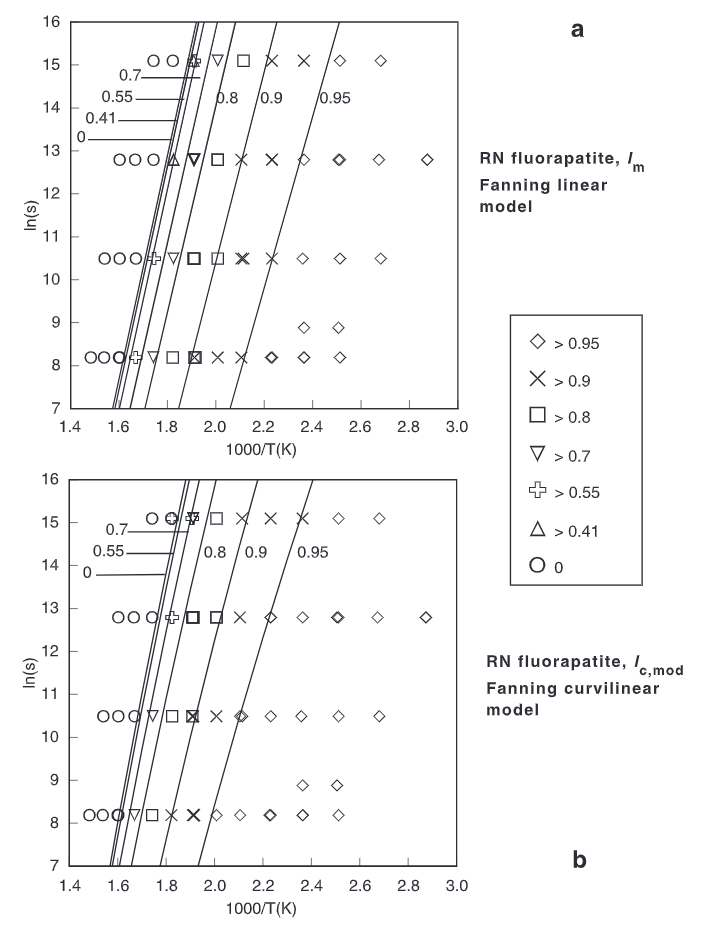

In [6]:
x = np.linspace(1.4, 3.0, 100)
plot(x)

NameError: name 'model' is not defined

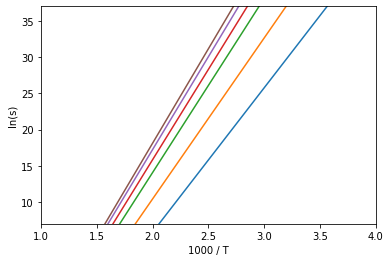

In [3]:
import matplotlib.pyplot as plt

x = np.linspace(1.4, 4.0, 100) / 1000. 
plt.plot(x * 1000, isoline(x, 0.95), "-")
plt.plot(x * 1000, isoline(x, 0.9), "-")
plt.plot(x * 1000, isoline(x, 0.8), "-")
plt.plot(x * 1000, isoline(x, 0.7), "-")
plt.plot(x * 1000, isoline(x, 0.55), "-")
plt.plot(x * 1000, isoline(x, 0.00001), "-")
plt.ylim(7, 37)
plt.xlim(1.0, 4.0)
plt.xlabel("1000 / T")
plt.ylabel("ln(s)")
plt.show()

# Fanning curvilinear (l_m)

In [4]:
import numpy as np

model = {"c0": -1394.1,
         "c1": 30.717,
         "c2": -3286.6,
         "c3": -79.069,
         "alpha": -0.41718, 
         "beta": 1.7251}



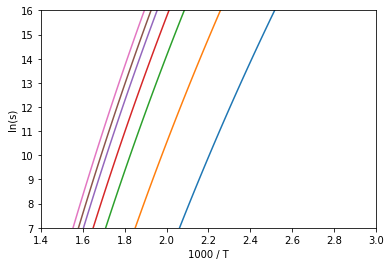

In [5]:
import matplotlib.pyplot as plt

x = np.linspace(1.4, 3.0, 100) / 1000. 
plt.plot(x * 1000, isoline(x, 0.95), "-")
plt.plot(x * 1000, isoline(x, 0.9), "-")
plt.plot(x * 1000, isoline(x, 0.8), "-")
plt.plot(x * 1000, isoline(x, 0.7), "-")
plt.plot(x * 1000, isoline(x, 0.55), "-")
plt.plot(x * 1000, isoline(x, 0.41), "-")
plt.plot(x * 1000, isoline(x, 0.01), "-")
plt.ylim(7, 16)
plt.xlim(1.4, 3.0)
plt.xlabel("1000 / T")
plt.ylabel("ln(s)")
plt.show()

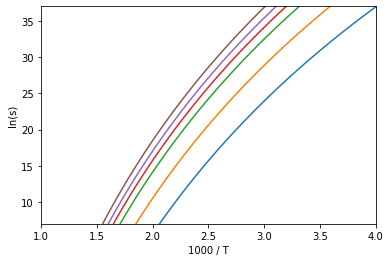

In [6]:
import matplotlib.pyplot as plt

x = np.linspace(1.4, 4.0, 100) / 1000. 
plt.plot(x * 1000, isoline(x, 0.95), "-")
plt.plot(x * 1000, isoline(x, 0.9), "-")
plt.plot(x * 1000, isoline(x, 0.8), "-")
plt.plot(x * 1000, isoline(x, 0.7), "-")
plt.plot(x * 1000, isoline(x, 0.55), "-")
plt.plot(x * 1000, isoline(x, 0.00001), "-")
plt.ylim(7, 37)
plt.xlim(1.0, 4.0)
plt.xlabel("1000 / T")
plt.ylabel("ln(s)")
plt.show()

# Fanning Linear (lcmod)

In [7]:
import numpy as np

model = {"c0": -20.870,
         "c1": 0.00077447,
         "c2": -26.133,
         "c3": 0.00033359,
         "alpha": -0.31430, 
         "beta": -3.1361}

def isoline(x, rc):
    A2 = (((1.0-rc**model["beta"])/ model["beta"])**(model["alpha"]) - 1.0) / model["alpha"]
    y = ((A2 - model["c0"]) * (x - model["c3"]) + (model["c1"] * model["c2"])) / model["c1"]
    return y

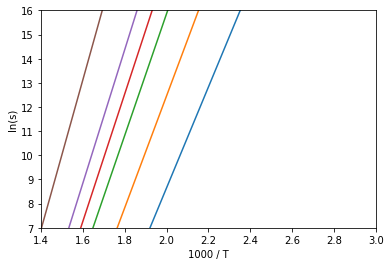

In [8]:
import matplotlib.pyplot as plt

x = np.linspace(1.4, 3.0, 100) / 1000. 
plt.plot(x * 1000, isoline(x, 0.95), "-")
plt.plot(x * 1000, isoline(x, 0.9), "-")
plt.plot(x * 1000, isoline(x, 0.8), "-")
plt.plot(x * 1000, isoline(x, 0.7), "-")
plt.plot(x * 1000, isoline(x, 0.55), "-")
plt.plot(x * 1000, isoline(x, 0.01), "-")
plt.ylim(7, 16)
plt.xlim(1.4, 3.0)
plt.xlabel("1000 / T")
plt.ylabel("ln(s)")
plt.show()

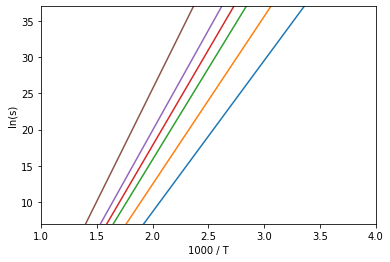

In [9]:
import matplotlib.pyplot as plt

x = np.linspace(1.4, 4.0, 100) / 1000. 
plt.plot(x * 1000, isoline(x, 0.95), "-")
plt.plot(x * 1000, isoline(x, 0.9), "-")
plt.plot(x * 1000, isoline(x, 0.8), "-")
plt.plot(x * 1000, isoline(x, 0.7), "-")
plt.plot(x * 1000, isoline(x, 0.55), "-")
plt.plot(x * 1000, isoline(x, 0.00001), "-")
plt.ylim(7, 37)
plt.xlim(1.0, 4.0)
plt.xlabel("1000 / T")
plt.ylabel("ln(s)")
plt.show()

# Fanning CurviLinear (lcmod)

In [10]:
import numpy as np

model = {"c0": -61.311,
         "c1": 1.2920,
         "c2": -100.53,
         "c3": -8.7225,
         "alpha": -0.35878, 
         "beta": -2.9633}

def isoline(x, rc):
    A2 = (((1.0-rc**model["beta"])/ model["beta"])**(model["alpha"]) - 1.0) / model["alpha"]
    y = ((A2 - model["c0"]) * (np.log(x) - model["c3"]) + (model["c1"] * model["c2"])) / model["c1"]
    return y

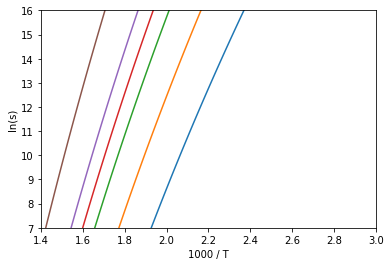

In [11]:
import matplotlib.pyplot as plt

x = np.linspace(1.4, 3.0, 100) / 1000. 
plt.plot(x * 1000, isoline(x, 0.95), "-")
plt.plot(x * 1000, isoline(x, 0.9), "-")
plt.plot(x * 1000, isoline(x, 0.8), "-")
plt.plot(x * 1000, isoline(x, 0.7), "-")
plt.plot(x * 1000, isoline(x, 0.55), "-")
plt.plot(x * 1000, isoline(x, 0.00001), "-")
plt.ylim(7, 16)
plt.xlim(1.4, 3.0)
plt.xlabel("1000 / T")
plt.ylabel("ln(s)")
plt.show()

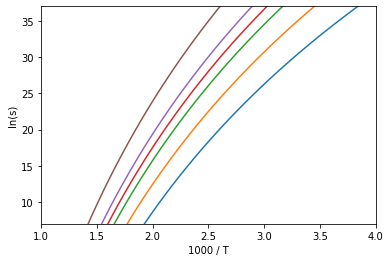

In [12]:
import matplotlib.pyplot as plt

x = np.linspace(1.4, 4.0, 100) / 1000. 
plt.plot(x * 1000, isoline(x, 0.95), "-")
plt.plot(x * 1000, isoline(x, 0.9), "-")
plt.plot(x * 1000, isoline(x, 0.8), "-")
plt.plot(x * 1000, isoline(x, 0.7), "-")
plt.plot(x * 1000, isoline(x, 0.55), "-")
plt.plot(x * 1000, isoline(x, 0.00001), "-")
plt.ylim(7, 37)
plt.xlim(1.0, 4.0)
plt.xlabel("1000 / T")
plt.ylabel("ln(s)")
plt.show()